In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
from astropy.time import Time
import scipy

import setigen as stg

import logging 


In [2]:
%matplotlib inline

In [34]:
logging.getLogger('blimpy.waterfall').setLevel(logging.ERROR)
logging.getLogger('hdf5plugin._filters').setLevel(logging.ERROR)


In [35]:
NOISE_MEAN = 3.5e6
DF = 2.7939677238464355
DT = 18.253611008
DR = 0.2
OBS_LENGTH = 300
SLEW_TIME=0
START_INDEX = 256
SNR = 100

def create_time_array(cadence_number=6, mjd_start=60000, obs_length=300, slew_time=0):
    '''
    '''
    t_start_arr = [Time(mjd_start, format='mjd').unix]
    for i in range(1, cadence_number):
        t_start_arr.append(t_start_arr[i - 1] + obs_length + slew_time)   
    return t_start_arr

def create_frame(source_name, t_start, df, dt, obs_length):
    '''
    '''
    frame = stg.Frame(fchans=512,
                      tchans=int(obs_length/dt),
                      df=df,
                      dt=18.253611008,
                      fch1=1330*u.MHz,
                      ascending=False,
                      t_start=t_start,
                      source_name=source_name)        
    print(frame.t_start)
    return frame    
        
def add_simple_rfi_path():
    pass

def add_noise_to_frame(frame, noise_mean):
    return frame.add_noise(noise_mean)

def add_rfi_to_frame(frame):
    return frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=index),
            drift_rate=0),
            stg.constant_t_profile(level=frame.get_intensity(snr=10)),
            stg.gaussian_f_profile(width=5*frame.df*u.Hz),
            stg.constant_bp_profile(level=1),
            doppler_smearing=True)

def add_signal_to_frame(frame, DR, SNR, index):
    return frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=index),
            drift_rate=DR*u.Hz/u.s),
            stg.constant_t_profile(level=frame.get_intensity(snr=SNR)),
            stg.sinc2_f_profile(width=2*frame.df*u.Hz),
            stg.constant_bp_profile(level=1),
            doppler_smearing=True)

def create_cadence(cadence_number=6):
    time_list = create_time_array(obs_length=OBS_LENGTH, slew_time=SLEW_TIME)
    cadence = stg.Cadence()
    for i in range(cadence_number):
        index = START_INDEX + i * DR * (OBS_LENGTH + SLEW_TIME)/DF
        if i % 2 == 0: # ON sources
            source_name = f'ON'
            frame = create_frame(source_name, time_list[i], DF, DT, OBS_LENGTH)
            add_noise_to_frame(frame, NOISE_MEAN)
            add_signal_to_frame(frame, DR, SNR, index)        
        else:
            source_name = f'OFF_0{(i + 1) // 2}'
            frame = create_frame(source_name, time_list[i], DF, DT, OBS_LENGTH)            
            add_noise_to_frame(frame, NOISE_MEAN)

        print('\nFrame info:')
        print('Freq: {}, T_start: {}, T_stop: {}'.format(frame.get_frequency(index=index), 
                                                         frame.t_start, 
                                                         frame.t_stop))
        frame.save_h5(filename=f'frame_0{i}.h5')
        cadence.append(frame)
        del frame

        frame = stg.Frame(f'frame_0{i}.h5')
        print(f"Read-in time: {frame.t_start}")
        del frame

    cadence.plot()
    # plt.savefig('/home/marc/tmp/setigen.png')


create_cadence(cadence_number=6)


1677283200.0

Frame info:
Freq: 1329999287.5382304, T_start: 1677283200.0, T_stop: 1677283492.0577762


Read-in time: 1677283200.0
1677283500.0

Frame info:
Freq: 1329999347.5382304, T_start: 1677283500.0, T_stop: 1677283792.0577762
Read-in time: 1677283499.9999998
1677283800.0

Frame info:
Freq: 1329999407.5382304, T_start: 1677283800.0, T_stop: 1677284092.0577762
Read-in time: 1677283800.0
1677284100.0

Frame info:
Freq: 1329999467.5382304, T_start: 1677284100.0, T_stop: 1677284392.0577762
Read-in time: 1677284099.9999998
1677284400.0

Frame info:
Freq: 1329999527.5382304, T_start: 1677284400.0, T_stop: 1677284692.0577762
Read-in time: 1677284400.0000002
1677284700.0

Frame info:
Freq: 1329999587.5382304, T_start: 1677284700.0, T_stop: 1677284992.0577762
Read-in time: 1677284699.9999998
Error in callback <function flush_figures at 0x7fae41533520> (for post_execute):


KeyboardInterrupt: 

In [ ]:
209.19-12.72, 259.29-12.72

(196.47, 246.57000000000002)

In [ ]:
frame = stg.Frame(f'frame_00.h5')

In [ ]:
from pprint import pprint

In [ ]:
frame.mjd, frame.t_start

(58465.717094907406, 1544721157.0)

In [ ]:
pprint(vars(frame.waterfall))

{'beam_axis': 1,
 'container': <blimpy.io.hdf_reader.H5Reader object at 0x7f89317faf20>,
 'data': array([[[4390676.380094  , 3728591.00589704, 3083047.55771828, ...,
         2904837.45258958, 3659323.70197464, 3099588.50068814]],

       [[3705403.77393413, 2922317.83593378, 3435747.60071302, ...,
         2886870.65097864, 2936735.43639872, 3560919.88933472]],

       [[4322125.23424019, 3588174.51355123, 3508594.04712778, ...,
         3215457.17125168, 3817866.04128365, 3362614.77803309]],

       ...,

       [[4527076.42507277, 3107852.42482715, 3620819.96528332, ...,
         3170769.97167721, 3447405.18241943, 3636232.52029535]],

       [[3650833.36333335, 3753018.79740998, 3425345.10491306, ...,
         3557953.93767454, 3095878.04489291, 3640272.0909537 ]],

       [[3269496.00059095, 3160978.51217979, 3641593.21005437, ...,
         2946615.33248851, 2937312.79372855, 3472047.03510611]]]),
 'ext': '.h5',
 'file_header': {'DIMENSION_LABELS': array(['time', 'feed_id', 'frequ

In [ ]:
pprint(vars(frame.waterfall.container))

{'_d_type': 'float32',
 '_n_bytes': 4,
 'available_memory': 196647182336,
 'beam_axis': 1,
 'chan_start_idx': 0,
 'chan_stop_idx': 512,
 'data': array([[[4390676.380094  , 3728591.00589704, 3083047.55771828, ...,
         2904837.45258958, 3659323.70197464, 3099588.50068814]],

       [[3705403.77393413, 2922317.83593378, 3435747.60071302, ...,
         2886870.65097864, 2936735.43639872, 3560919.88933472]],

       [[4322125.23424019, 3588174.51355123, 3508594.04712778, ...,
         3215457.17125168, 3817866.04128365, 3362614.77803309]],

       ...,

       [[4527076.42507277, 3107852.42482715, 3620819.96528332, ...,
         3170769.97167721, 3447405.18241943, 3636232.52029535]],

       [[3650833.36333335, 3753018.79740998, 3425345.10491306, ...,
         3557953.93767454, 3095878.04489291, 3640272.0909537 ]],

       [[3269496.00059095, 3160978.51217979, 3641593.21005437, ...,
         2946615.33248851, 2937312.79372855, 3472047.03510611]]]),
 'f_begin': 1329.9985694885254,
 'f_e

In [ ]:
frame = stg.Frame(f'frame_00.h5')
pprint(vars(frame.waterfall.container))

{'_d_type': 'float32',
 '_n_bytes': 4,
 'available_memory': 196390727680,
 'beam_axis': 1,
 'chan_start_idx': 0,
 'chan_stop_idx': 512,
 'data': array([[[3408598.41928332, 3608692.73218869, 3924669.62648136, ...,
         4482653.10508214, 3788165.59148128, 3448371.93539162]],

       [[3204792.38265287, 3284738.51097071, 3563112.23397373, ...,
         3212097.14281925, 3896596.76811076, 3658447.29481663]],

       [[2960920.16235639, 2851072.67635957, 3758012.60588649, ...,
         3302283.18426592, 3189282.77585802, 3969672.94728974]],

       ...,

       [[3551546.54777527, 3653645.5805929 , 3526331.00228421, ...,
         3376070.33191598, 3962251.37299549, 3781392.52041181]],

       [[3213863.52688442, 3434819.90501224, 3165715.52219951, ...,
         3544182.90790515, 3335355.64529034, 3557865.82608512]],

       [[3742128.56778672, 3417776.85848901, 3638126.27727676, ...,
         3305720.08467453, 3179853.94258534, 3583292.90647169]]]),
 'f_begin': 1329.9985694885254,
 'f_e

In [ ]:
new_cadence = stg.Cadence()

In [ ]:
new_cadence = stg.Cadence(frame_list=frame_list,
                          order="ABACAD")

new_cadence = stg.OrderedCadence(order="ABACAD")



new_cadence[0].add_noise_from_obs()

In [ ]:
fr = stg.Frame(tchans=16, fchans=256)
fr.get_params()

{'fchans': 256,
 'tchans': 16,
 'df': 2.7939677238464355,
 'dt': 18.253611008,
 'fch1': 6000000000.0,
 'ascending': False}

In [ ]:
fr.add_metadata({"order_label": "A"})

fr.get_metadata()

{'fchans': 256,
 'tchans': 16,
 'df': 2.7939677238464355,
 'dt': 18.253611008,
 'fch1': 6000000000.0,
 'ascending': False,
 'order_label': 'A'}

In [ ]:
fr = stg.Frame(tchans=16, fchans=256)
frame_list = [stg.Frame(tchans=16, fchans=256) for i in range(6)]
frame_list

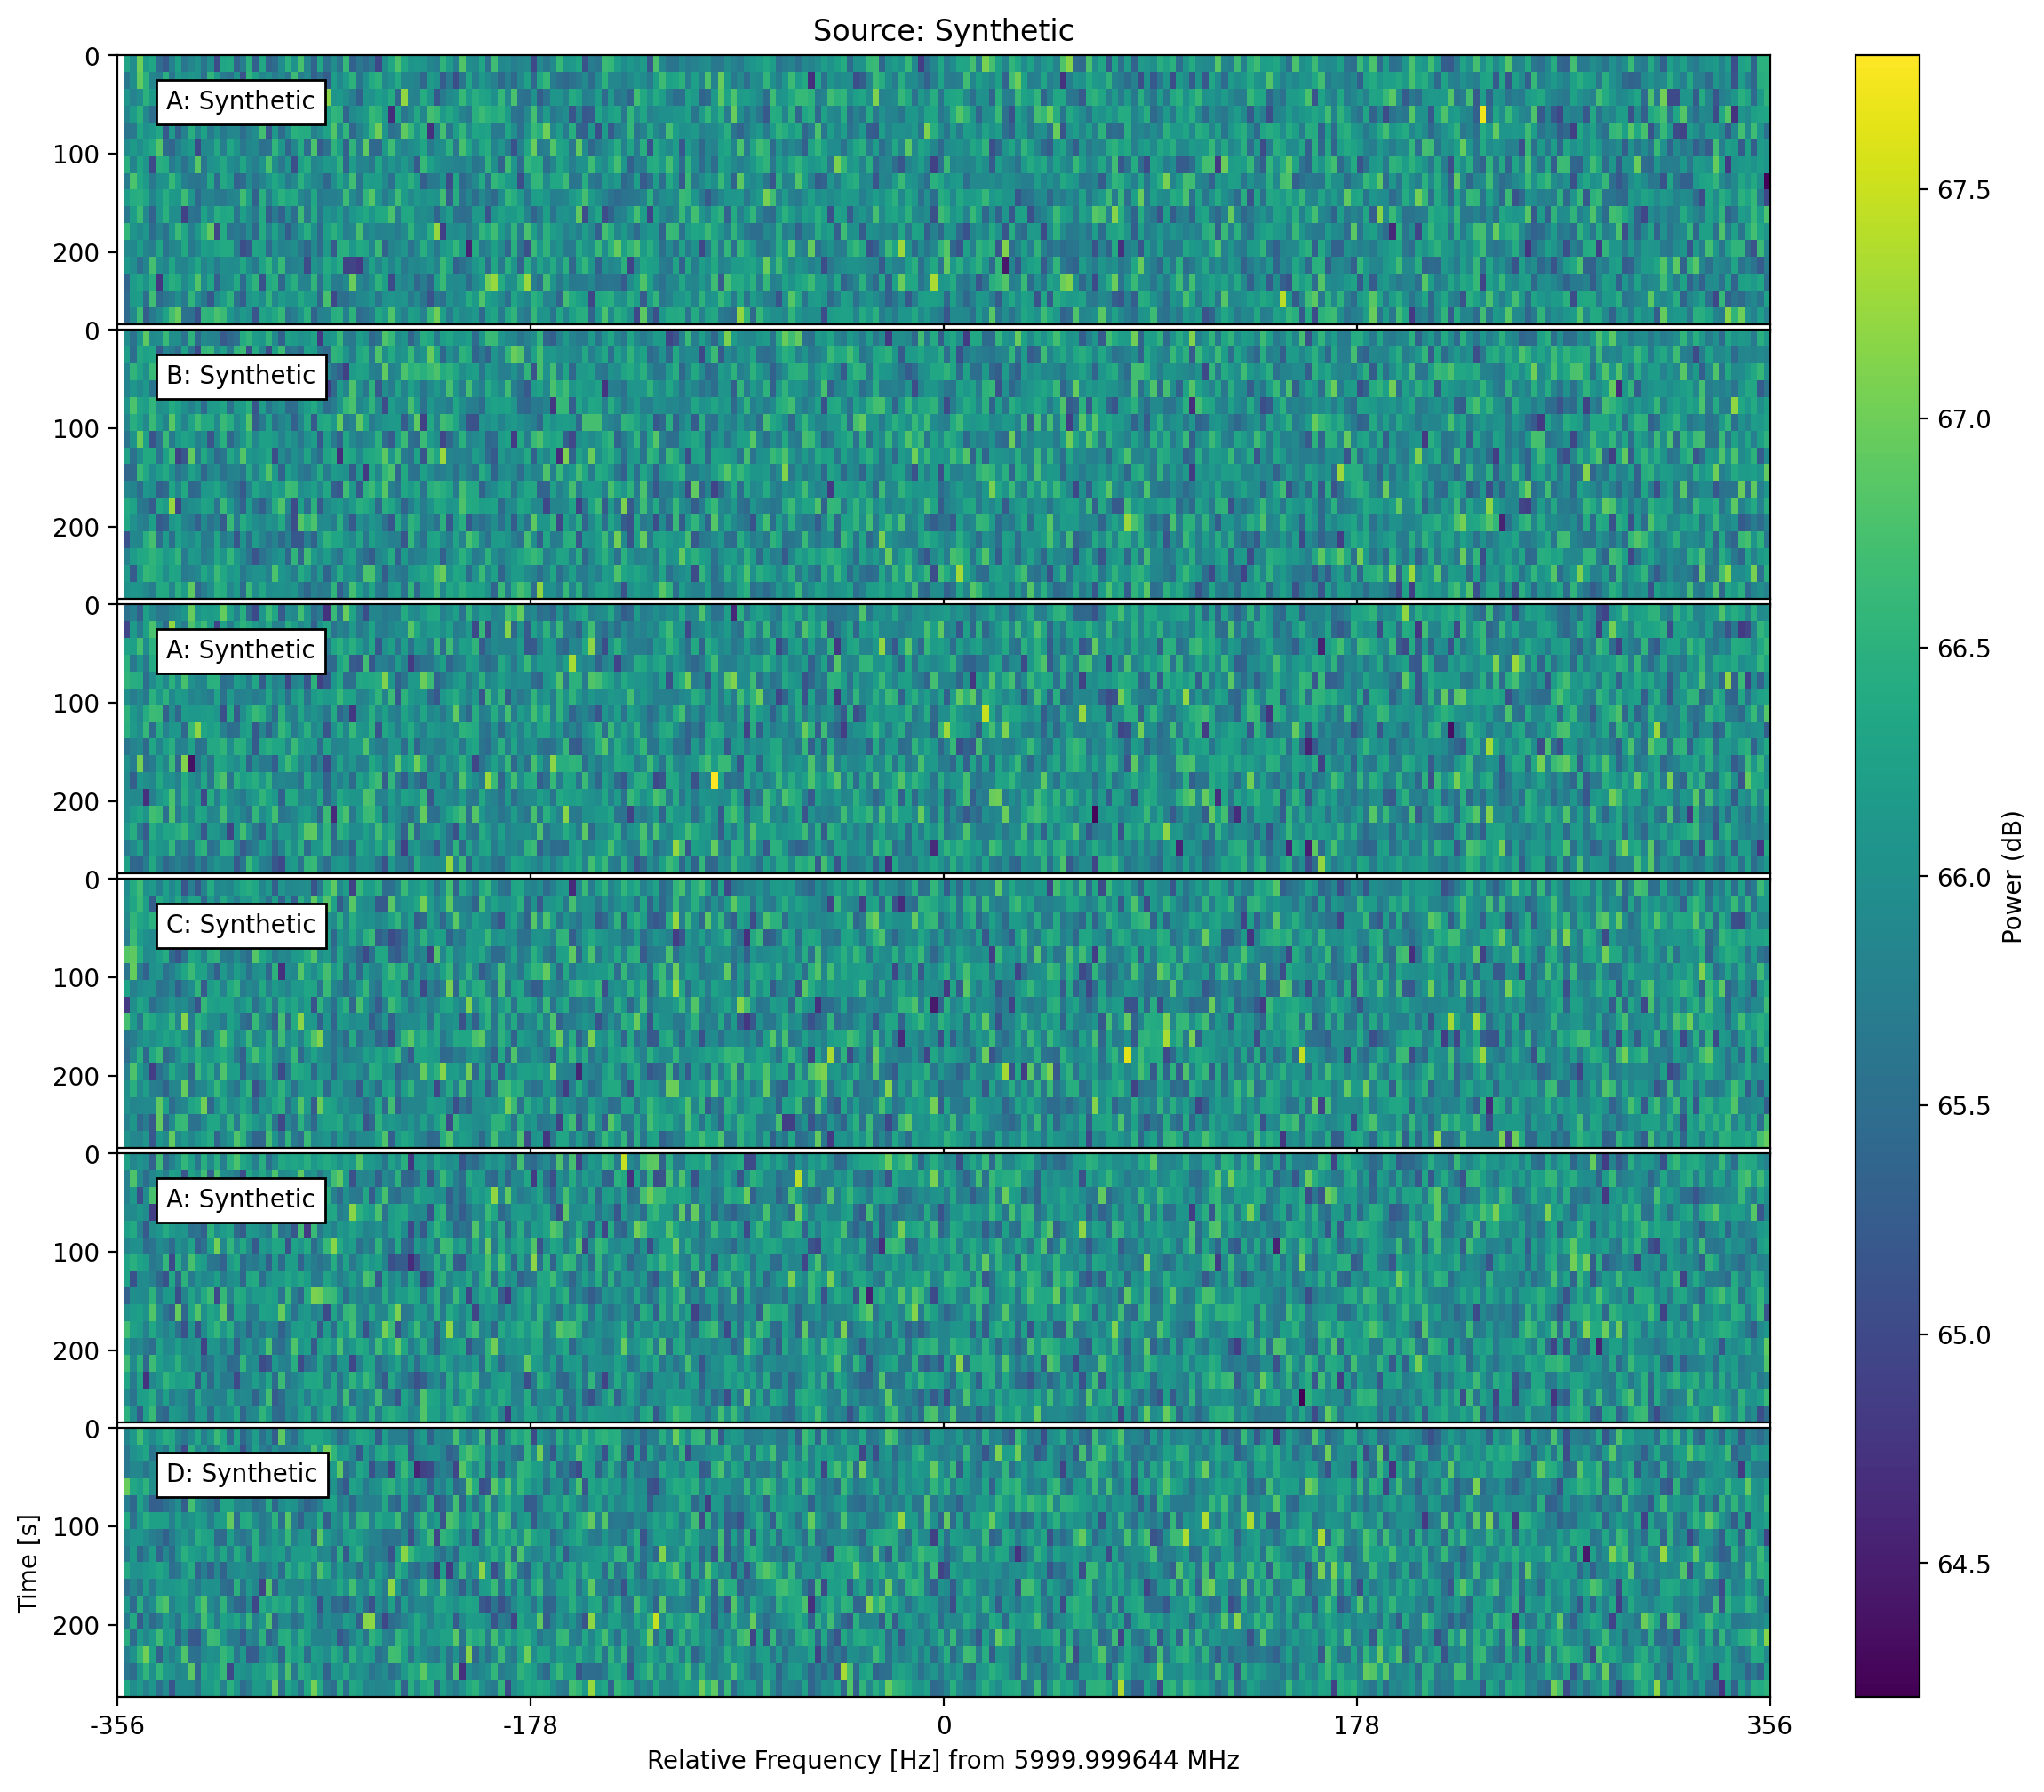

start: 1696652197.8954597
start: 1696652494.9532359
start: 1696652792.011012
start: 1696653089.0687883
start: 1696653386.1265645
start: 1696653683.1843407
1696652197.8954597 1696652197.8954597
1696652792.011012 1696652197.8954597
1696653386.1265645 1696652197.8954597


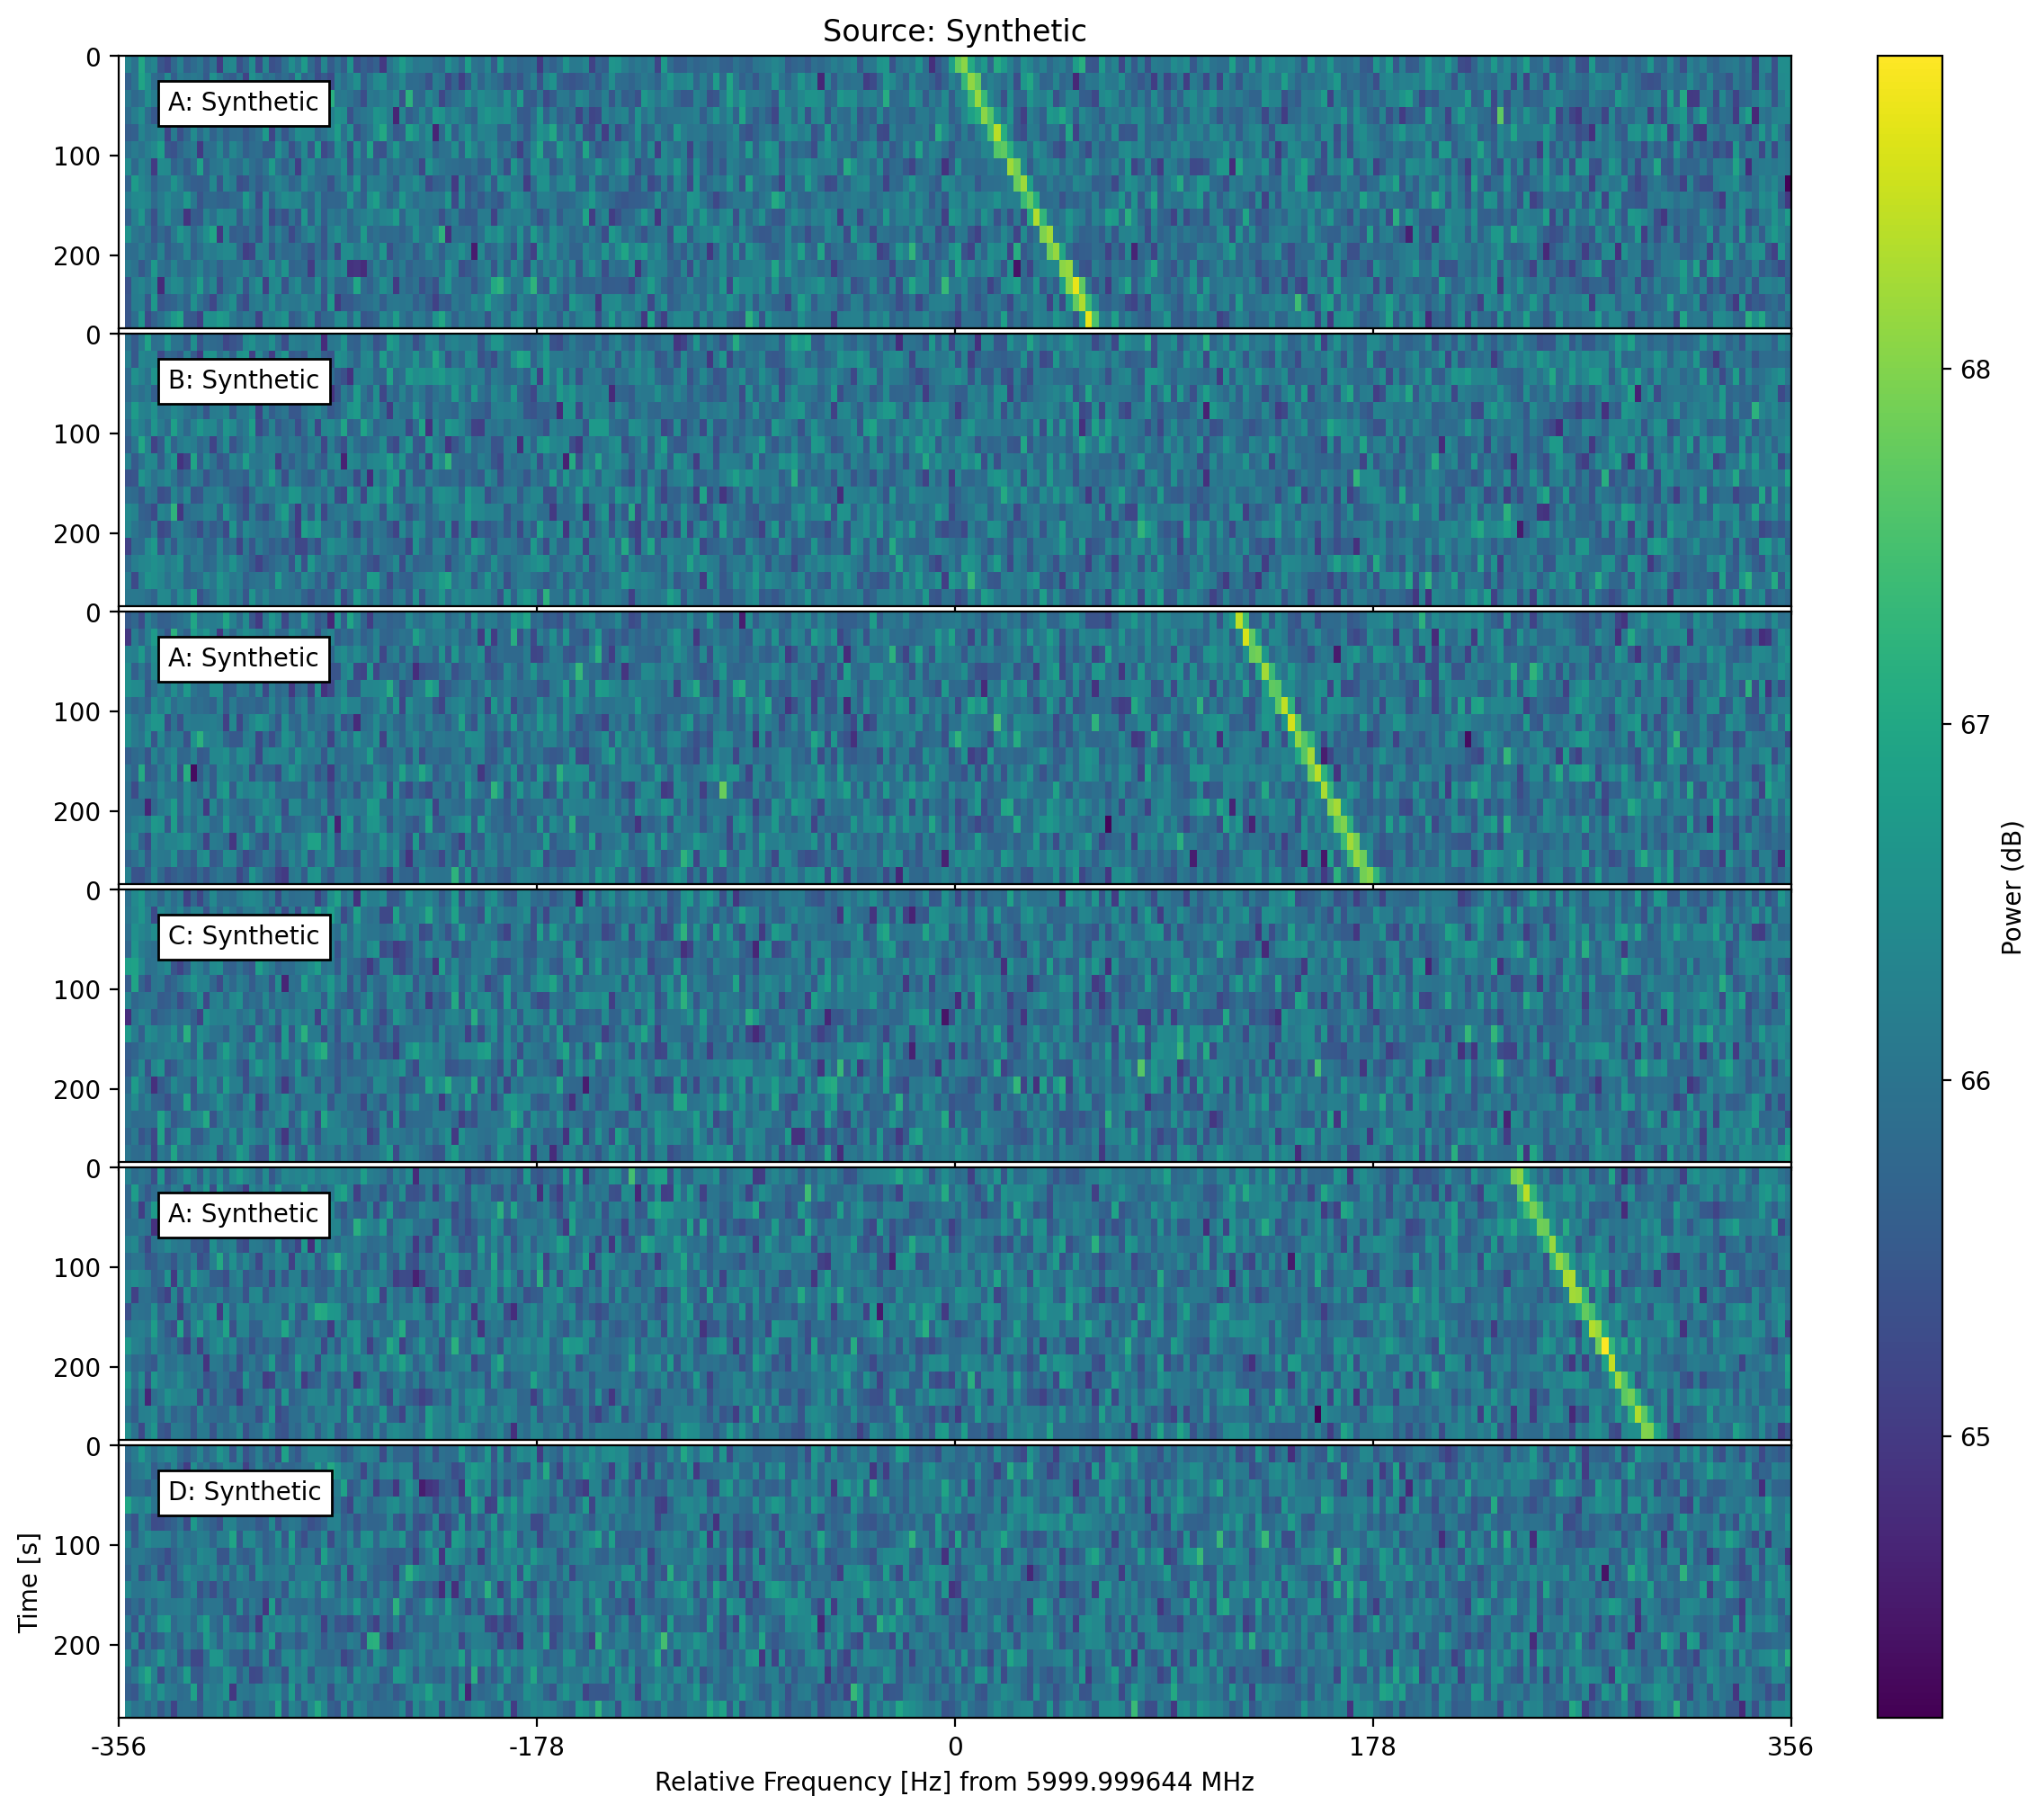

In [ ]:
c = stg.OrderedCadence([stg.Frame(tchans=16, fchans=256) for i in range(6)], 
                       order="ABACAD",
                       t_slew=5,
                       t_overwrite=True)

c.apply(lambda fr: fr.add_noise(4e6))
c.plot()
plt.show()

for fr in c:
    print(f"start: {fr.t_start}")

c.by_label("A").add_signal(stg.constant_path(f_start=c[0].get_frequency(index=128),
                           drift_rate=0.2*u.Hz/u.s),
                stg.constant_t_profile(level=c[0].get_intensity(snr=30)),
                stg.sinc2_f_profile(width=2*c[0].df*u.Hz),
                stg.constant_bp_profile(level=1),
                doppler_smearing=True)
c.plot()
plt.show()

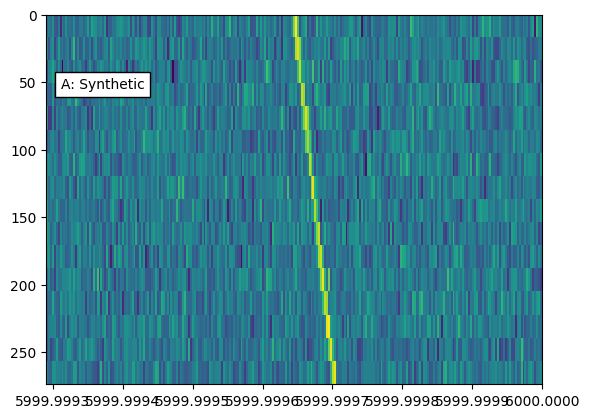

In [ ]:
stg.cadence.plot_waterfall(c[0])
plt.show()

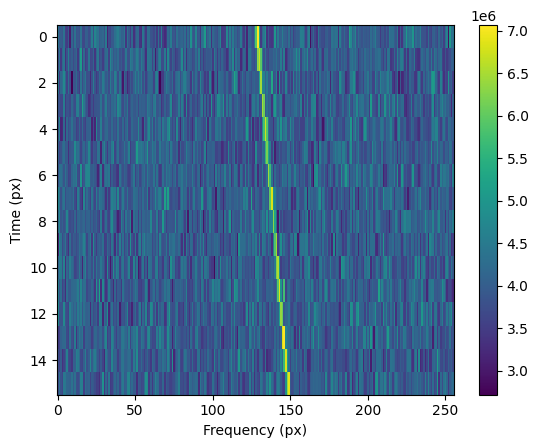

In [ ]:
c[0].plot()
plt.show()

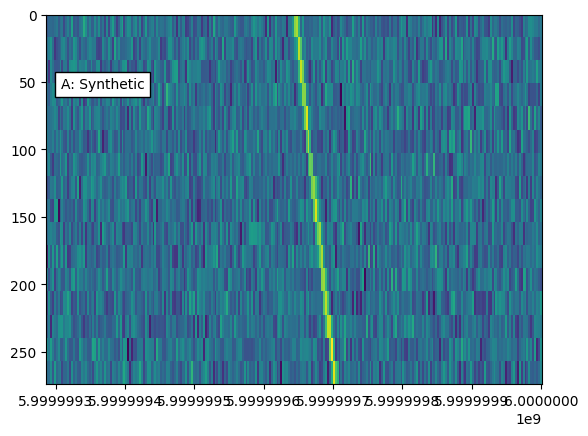

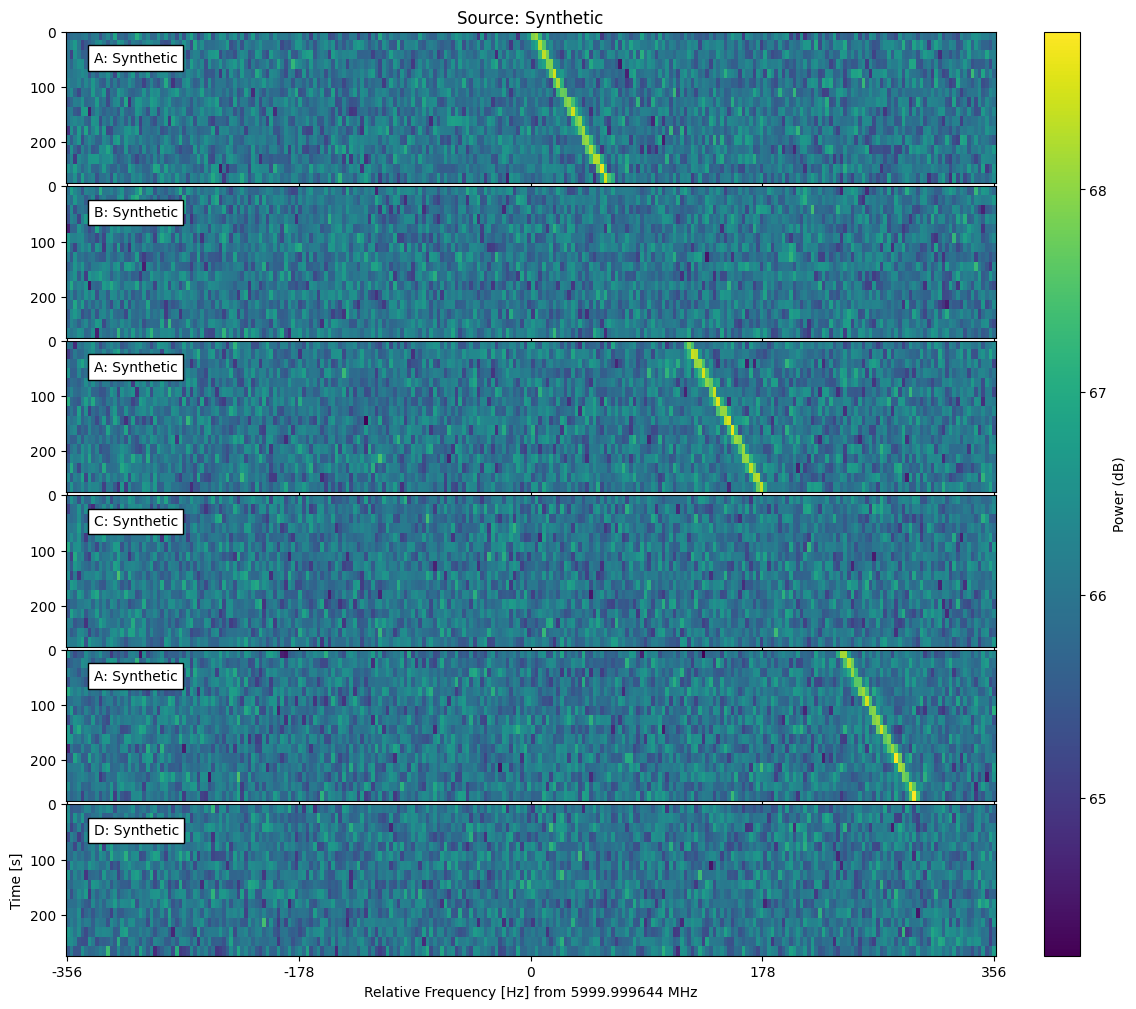

In [ ]:
def plot_waterfall(frame, f_start=None, f_stop=None, **kwargs):
    """
    Version of blimpy.stax plot_waterfall method without normalization.

    Parameters
    ----------
    frame : Frame
        Frame to plot
    f_start : float
        Min frequency, in MHz
    f_stop : float
        Max frequency, in MHz

    Return 
    ------
    plot : matplotlib.image.AxesImage
        Spectrogram axes object
    """
    MAX_IMSHOW_POINTS = (4096, 1268)
    from blimpy.utils import rebin
    
    # Load in the data from fil
    fs, data = frame.fs, frame.data

    # Make sure waterfall plot is under 4k*4k
    dec_fac_x, dec_fac_y = 1, 1

    # rebinning data to plot correctly with fewer points
    if data.shape[0] > MAX_IMSHOW_POINTS[0]:
        dec_fac_x = data.shape[0] / MAX_IMSHOW_POINTS[0]
    if data.shape[1] > MAX_IMSHOW_POINTS[1]:
        dec_fac_y =  int(np.ceil(data.shape[1] / MAX_IMSHOW_POINTS[1]))
    data = rebin(data, dec_fac_x, dec_fac_y)

    # determine extent of the plotting panel for imshow
    nints = data.shape[0]
    bottom = (nints - 1) * frame.dt # in seconds
    extent=(fs[0] - frame.df / 2, # left
            fs[-1] + frame.df / 2, # right
            bottom, # bottom
            0.0) # top

    # plot and scale intensity (log vs. linear)
    kwargs["cmap"] = kwargs.get("cmap", "viridis")
    data = stg.db(data)

    # display the waterfall plot
    this_plot = plt.imshow(data,
        aspect="auto",
        rasterized=True,
        interpolation="none",
        extent=extent,
        **kwargs
    )

    # add source name
    ax = plt.gca()
    if "order_label" in frame.metadata:
        label = f'{frame.metadata["order_label"]}: {frame.source_name}'
    else:
        label = frame.source_name

    plt.text(0.03, 0.8, 
             label, 
             transform=ax.transAxes, 
             bbox=dict(facecolor="white"))

    return this_plot



def plot_cadence(cadence):
    """
    Collect real observations of blc1 candidate, and produce synthetic copies using extracted
    properties. Plot real and synthetic cadences side-by-side for easy comparison.

    Parameters
    ----------
    cadence : Cadence
        Cadence to plot
    """
    n_plots = len(cadence)
    height_ratios = np.full(n_plots, cadence.tchans * cadence.dt)
    
    # Create plot grid
    fig_array, axs = plt.subplots(nrows=n_plots,
                                  ncols=1,
                                  sharex=True,
                                  sharey=False, 
                                  # dpi=1200,
                                  figsize=(12, 2*n_plots),
                                  gridspec_kw={"height_ratios" : height_ratios})
    
    # Iterate over data for min/max values, real
    for i, frame in enumerate(cadence):
        data = frame.data
        if i == 0:
            px_min = np.min(data)
            px_max = np.max(data)
        else:
            if px_min > np.min(data):
                px_min = np.min(data)
            if px_max < np.max(data):
                px_max = np.max(data)
    
    # Plot real observations
    for i, frame in enumerate(cadence):
        plt.sca(axs[i])
        if i == 0:
            plt.title(f"Source: {frame.source_name}")
            
        last_plot = plot_waterfall(frame, 
                                   vmin=stg.db(px_min), 
                                   vmax=stg.db(px_max))
        
    F_min = cadence.fmin
    F_max = cadence.fmax

    # Compute the midpoint frequency for the x-axis.
    F_mid = np.abs(F_min + F_max) / 2
        
    units = "Hz"
    xloc = np.linspace(F_min, F_max, 5)
    xticks = [round(loc_freq) for loc_freq in xloc - F_mid]
    if np.max(xticks) > 1000:
        xticks = [xt / 1000 for xt in xticks]
        units = "kHz"
    plt.xticks(xloc, xticks)
    plt.xlabel("Relative Frequency [%s] from %f MHz" % (units, F_mid * 1e-6))
    plt.ylabel("Time [s]")
    
    # Adjust plots
    plt.subplots_adjust(hspace=0.02, wspace=0.1)    
        
    # Add colorbar.
    cax = fig_array.add_axes([0.94, 0.11, 0.03, 0.77])
    fig_array.colorbar(last_plot, cax=cax, label="Power (dB)")

plot_waterfall(c[0])
plt.show()

plot_cadence(c)
plt.show()

[-100.  -80.  -60.  -40.  -20.    0.   20.   40.   60.   80.  100.]


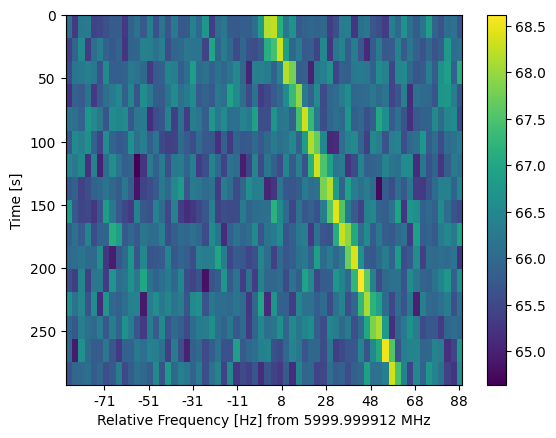

[-100.  -80.  -60.  -40.  -20.    0.   20.   40.   60.   80.  100.]


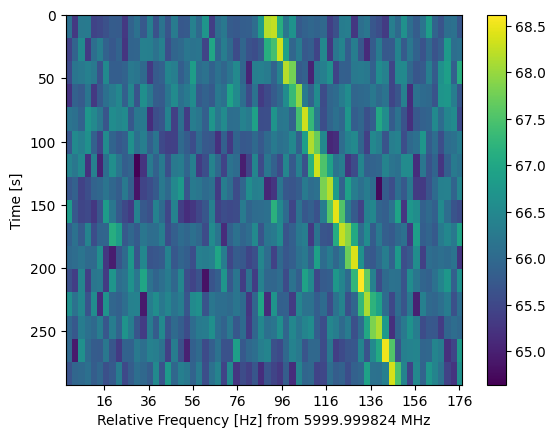

[-100.  -80.  -60.  -40.  -20.    0.   20.   40.   60.   80.  100.]


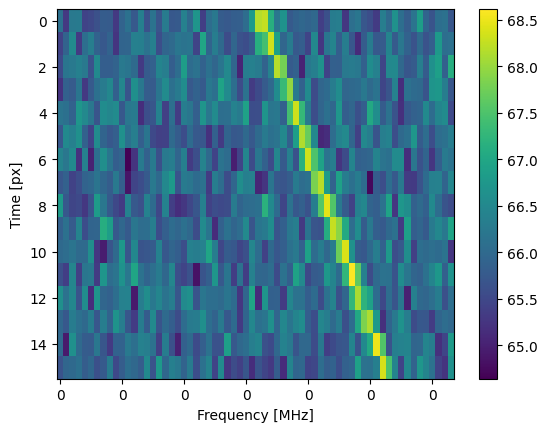

In [ ]:
import matplotlib.ticker as ticker

def _adjust_extent(extent):
    f_l, f_r = extent[0], extent[1]
    f_range = np.abs(f_l - f_r)
    if f_range > 1e9:
        return 1e9, "GHz"
    elif f_range > 1e6:
        return 1e6, "MHz" 
    elif f_range > 1e3:
        return 1e3, "kHz" 
    else:
        return 1, "Hz"

def plot_waterfall(frame, 
                   axis_style="fmid", 
                   use_db=False, 
                   use_cb=True, 
                   use_label=False,
                   **kwargs):
    """
    Enhanced frame plotting.
    
    Parameters
    ----------
    frame : Frame
        Frame to plot
    axis_style : str, optional
        Types of axis labels ("fmid", "fmin", "px")
    use_db : bool, optional
        Option to convert intensities to dB
    use_cb : bool, optional
        Whether to display colorbar
    use_label : bool, optional
        Option to place target name as a label in plot

    Return 
    ------
    plot : matplotlib.image.AxesImage
        Spectrogram axes object
    """
    # plot and scale intensity (log vs. linear)
    data = frame.data
    if use_db:
        data = stg.db(data)

    # matplotlib extend order is (left, right, bottom, top)
    if axis_style == "fmid":
        extent = np.array([
            frame.fmin - frame.fmid - frame.df / 2,
            frame.fmax - frame.fmid + frame.df / 2,
            frame.tchans * frame.dt, 
            0
        ])
        units = "Hz"
        xlabel = f"Relative Frequency [{units}] from {frame.fmid * 1e-6:.6f} MHz"
        ylabel = "Time [s]"
    elif axis_style == "fmin":
        extent = (
            -frame.df / 2,
            frame.fmax - frame.fmin + frame.df / 2,
            frame.tchans * frame.dt, 
            0
        ) 
        units = "Hz"
        xlabel = f"Relative Frequency [{units}] from {frame.fmin * 1e-6:.6f} MHz"
        ylabel = "Time [s]"
    elif axis_style == "px":
        extent = (
            -1 / 2,
            frame.fchans - 1 / 2,
            frame.tchans - 1 / 2, 
            -1 / 2
        ) 
        xlabel = "Frequency [px]"
        ylabel = "Time [px]"
    else:
        raise ValueError("Label style must be 'fdelta', 'f', or 'px'")

    # display the waterfall plot
    p = plt.imshow(data,
        aspect="auto",
        rasterized=True,
        interpolation="none",
        extent=extent,
        **kwargs
    )
    if use_cb:
        plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # add source name
    ax = plt.gca()
    # ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))

    if use_label:
        if "order_label" in frame.metadata:
            label = f'{frame.metadata["order_label"]}: {frame.source_name}'
        else:
            label = frame.source_name

        loc = (0.03, 0.8)
        plt.text(loc[0], loc[1], 
                label, 
                transform=ax.transAxes, 
                bbox=dict(facecolor="white"))
    
    return p



def plot_cadence(cadence, 
                 axis_style="fmid", 
                 use_db=True, 
                 use_labels=True,
                 use_title=False,
                 use_slew_times=False,
                 **kwargs):
    """
    Collect real observations of blc1 candidate, and produce synthetic copies using extracted
    properties. Plot real and synthetic cadences side-by-side for easy comparison.

    Parameters
    ----------
    cadence : Cadence
        Cadence to plot
    axis_style : str, optional
        Types of axis labels ("fmid", "fmin", "px")
    use_db : bool, optional
        Option to convert intensities to dB
    use_labels : bool, optional
        Option to place target name as a label in each subplot
    """
    height_ratios = np.zeros(2 * len(cadence) - 1)
    for i, frame in enumerate(cadence):
        height_ratios[2*i] = frame.tchans * frame.dt
        if i != len(cadence) - 1:
            if use_slew_times:
                height_ratios[2*i+1] = cadence.slew_times[i]

    # Create plot grid
    fig_array, axs = plt.subplots(nrows=len(height_ratios),
                                  ncols=1,
                                  sharex=True,
                                  sharey=False, 
                                  # dpi=1200,
                                #   figsize=(6, np.sum(height_ratios)/cadence[0].tchans),
                                  gridspec_kw={"height_ratios" : height_ratios},
                                  **kwargs)
    
    # Iterate over data for min/max values, real
    for i, frame in enumerate(cadence):
        data = frame.data
        if i == 0:
            px_min = np.min(data)
            px_max = np.max(data)
        else:
            if px_min > np.min(data):
                px_min = np.min(data)
            if px_max < np.max(data):
                px_max = np.max(data)
    if use_db:
        px_min = stg.db(px_min)
        px_max = stg.db(px_max)
    
    # Plot real observations
    for i, frame in enumerate(cadence):
        plt.sca(axs[2*i])
        if use_title and i == 0:
            plt.title(f"Source: {frame.source_name}")
            
        last_plot = plot_waterfall(frame, 
                                   axis_style=axis_style,
                                   use_db=use_db,
                                   use_cb=False,
                                   use_label=use_labels,
                                   vmin=px_min, 
                                   vmax=px_max)
        
        if i != len(cadence) - 1:
            plt.sca(axs[2*i+1])
            ax = plt.gca()
            ax.yaxis.set_major_locator(ticker.NullLocator())
        
    plt.subplots_adjust(hspace=0., wspace=0.)    
        
    # Add colorbar.
    cax = fig_array.add_axes([0.94, 0.11, 0.03, 0.77])
    fig_array.colorbar(last_plot, cax=cax, label="Power (dB)")


# fr = stg.Frame(tchans=16, fchans=64)
# fr.add_noise(4e6)
# fr.add_signal(stg.constant_path(f_start=fr.get_frequency(index=fr.fchans//2),
#                            drift_rate=0.2*u.Hz/u.s),
#                 stg.constant_t_profile(level=fr.get_intensity(snr=30)),
#                 stg.sinc2_f_profile(width=2*fr.df*u.Hz),
#                 stg.constant_bp_profile(level=1),
#                 doppler_smearing=True)

# plot_waterfall(fr, axis_style="fmid", use_db=True)
# plt.show()
# plot_waterfall(fr, axis_style="fmin", use_db=True)
# plt.show()
# plot_waterfall(fr, axis_style="px", use_db=True)
# plt.show()

c = stg.OrderedCadence([stg.Frame(tchans=16, fchans=64) for i in range(6)], 
                       order="ABACAD",
                       t_slew=60,
                       t_overwrite=True)
c.apply(lambda fr: fr.add_noise(4e6))
c.by_label("A").add_signal(stg.constant_path(f_start=c[0].get_frequency(index=c.fchans//3),
                           drift_rate=c.fchans//2 / c.tchans * c[0].unit_drift_rate),
                stg.constant_t_profile(level=c[0].get_intensity(snr=30)),
                stg.sinc2_f_profile(width=2*c[0].df*u.Hz, width_mode="crossing", trunc=False),
                stg.constant_bp_profile(level=1),
                doppler_smearing=True)



# plot_cadence(c, axis_style="fmid", use_db=True, figsize=(8, 8))
# plt.show()
plot_cadence(c, axis_style="fmid", use_db=True, use_slew_times=True, figsize=(8, 10))
plt.show()
# plot_cadence(c, axis_style="fmin", use_db=True)
# plt.show()
# plot_cadence(c, axis_style="px", use_db=True)
# plt.show()

# plot_cadence(c, use_labels=False, use_title=True)
# plt.show()

In [ ]:
slew_times = [30, 30, 90, 90, 15, 15]

t_start_arr = [Time(60000, format='mjd').unix]
for i in range(1, len(slew_times) + 1):
    t_start_arr.append(t_start_arr[i - 1] + stg.Frame(tchans=16, fchans=64).obs_length + slew_times[i - 1])   

c = stg.OrderedCadence([stg.Frame(tchans=16, fchans=2**15, t_start=t_start_arr[i]) 
                        for i in range(len(t_start_arr))], 
                       order="ABACADA")
c.apply(lambda fr: fr.add_noise(4e6))
c.by_label("A").add_signal(stg.constant_path(f_start=c[0].get_frequency(index=c.fchans//3),
                           drift_rate=c.fchans//2 / c.tchans * c[0].unit_drift_rate),
                stg.constant_t_profile(level=c[0].get_intensity(snr=30)),
                stg.sinc2_f_profile(width=2*c[0].df*u.Hz*2**10
                                    , width_mode="crossing", trunc=False),
                stg.constant_bp_profile(level=1),
                doppler_smearing=True)

print(c.slew_times)
plot_cadence(c, axis_style="fmid", use_db=True, use_slew_times=True, figsize=(8, 10))
plt.show()

[30. 30. 90. 90. 15. 15.]


NameError: name 'plot_cadence' is not defined

In [ ]:
hasattr(c[0].ts[0], '__iter__')

False

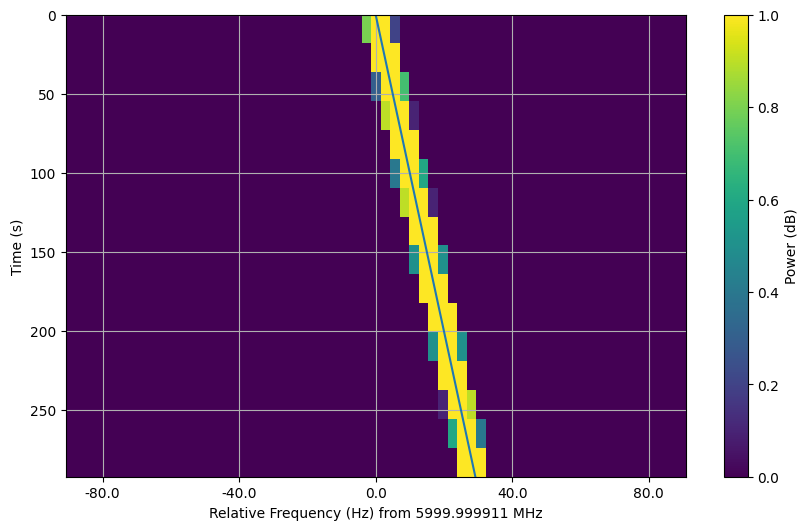

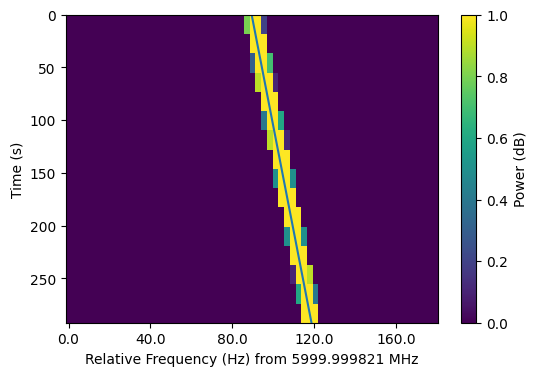

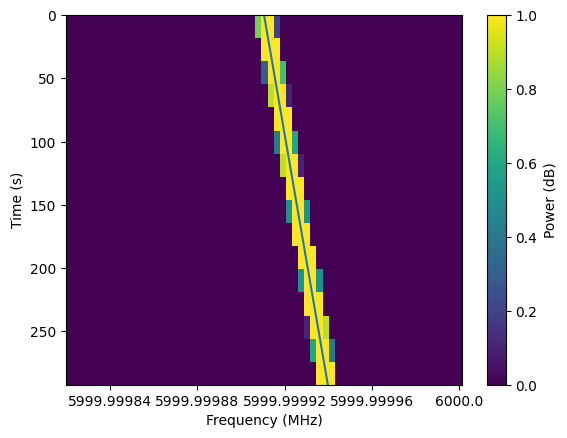

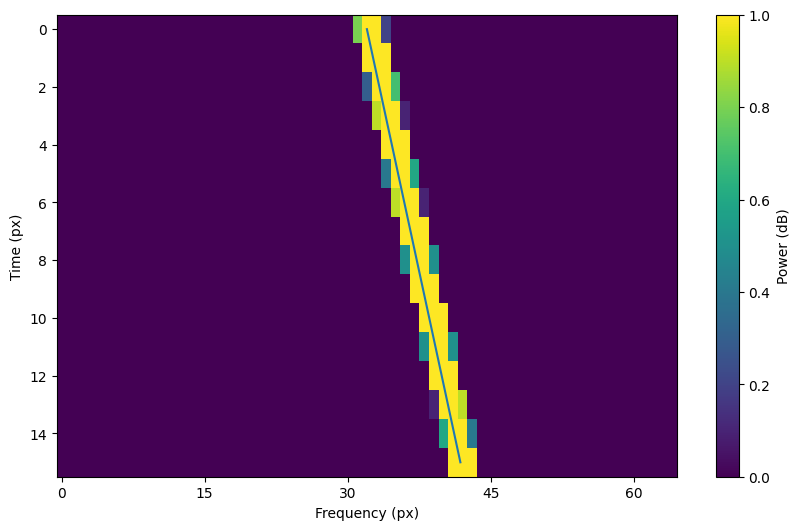

In [15]:
fr = stg.Frame(tchans=16, fchans=2**6+1)
# fr.add_noise(4e6)
drift_rate = 0.1
fr.add_signal(stg.constant_path(f_start=fr.get_frequency(index=fr.fchans//2),
                           drift_rate=drift_rate),
                stg.constant_t_profile(level=1),
                stg.box_f_profile(width=3*fr.df),
                stg.constant_bp_profile(level=1),
                doppler_smearing=True)

plt.figure(figsize=(10, 6))
stg.plot_waterfall(fr, axis_style="fmid", use_db=False, use_grid=True)
plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2) - fr.fmid, fr.ts_ext)
plt.show()

plt.figure(figsize=(6, 4))
stg.plot_waterfall(fr, axis_style="fmin", use_db=False)
plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2) - fr.fmin, fr.ts_ext)
plt.show()

# plt.figure(figsize=(6, 4))
stg.plot_waterfall(fr, axis_style="f", use_db=False)
plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2), fr.ts_ext)
plt.show()

plt.figure(figsize=(10, 6))
stg.plot_waterfall(fr, axis_style="px", use_db=False)
plt.plot(fr.ts * drift_rate / fr.df + fr.fchans//2, fr.ts / fr.dt)
plt.show()

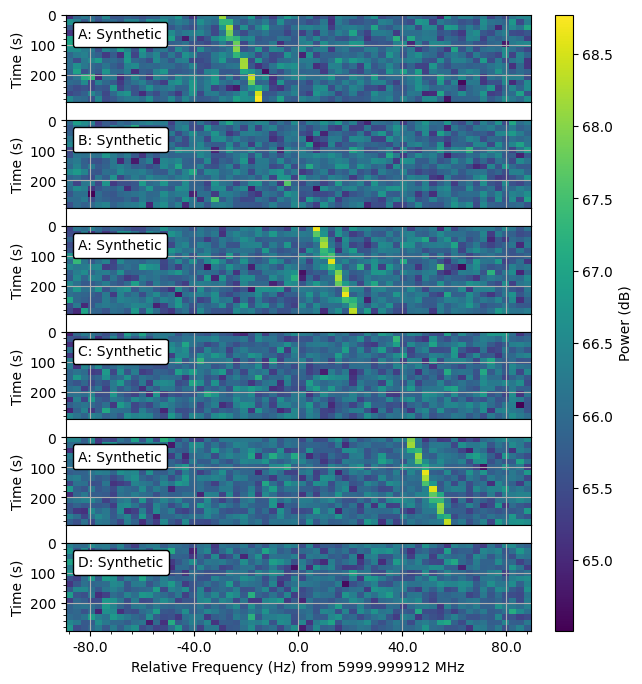

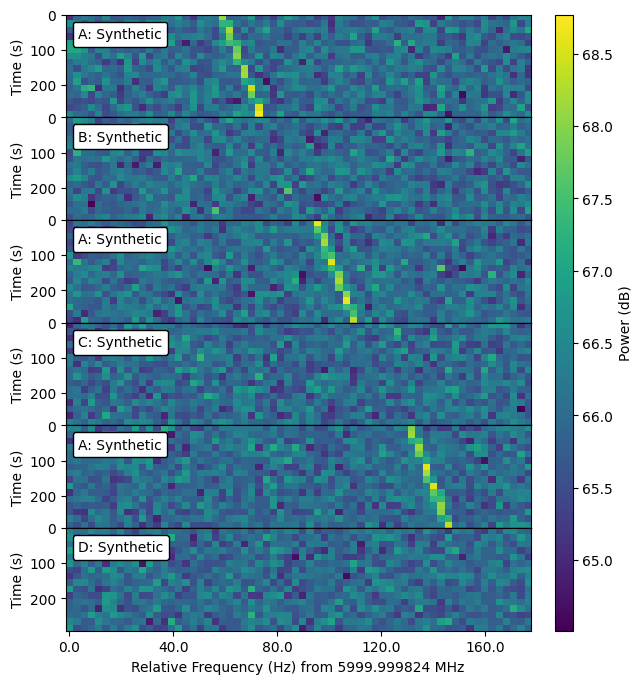

In [11]:
c = stg.OrderedCadence([stg.Frame(tchans=16, fchans=64) for i in range(6)], 
                       order="ABACAD",
                       t_slew=60,
                       t_overwrite=True)
c.apply(lambda fr: fr.add_noise(4e6))
c.by_label("A").add_signal(stg.constant_path(f_start=c[0].get_frequency(index=c.fchans//3),
                           drift_rate=c.fchans//2 / c.tchans * c[0].unit_drift_rate),
                stg.constant_t_profile(level=c[0].get_intensity(snr=30)),
                stg.sinc2_f_profile(width=2*c[0].df*u.Hz, width_mode="crossing", trunc=False),
                stg.constant_bp_profile(level=1),
                doppler_smearing=True)


# figsize = (4, 6)
# figsize = None
figsize = (6, 8)
plt.figure(figsize=figsize)
stg.plot_cadence(c,
                 axis_style="fmid", 
                 use_db=True, 
                 use_slew_times=True, 
                 use_minor_ticks=True,
                 use_grid=True,)
plt.show()

plt.figure(figsize=figsize)
stg.plot_cadence(c,
                 axis_style="fmin", 
                 use_db=True)
plt.show()


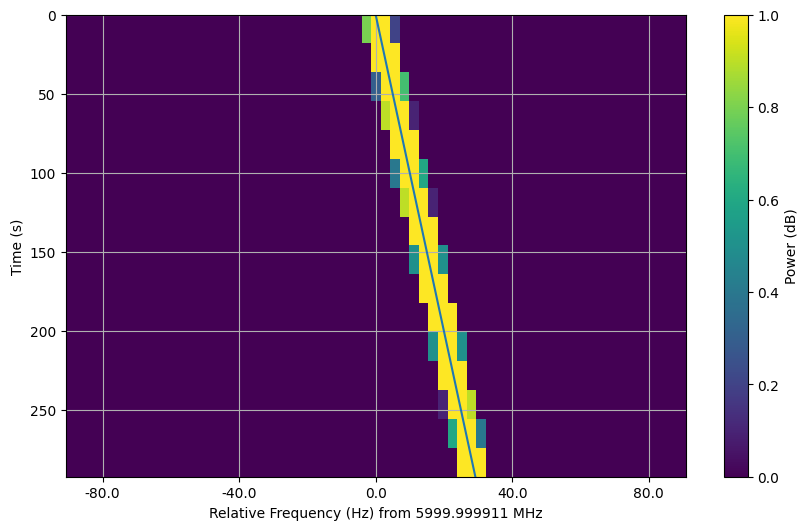

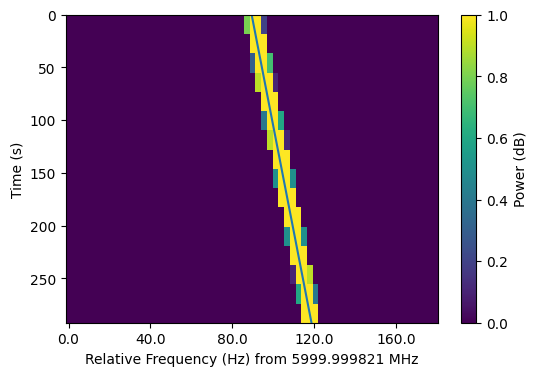

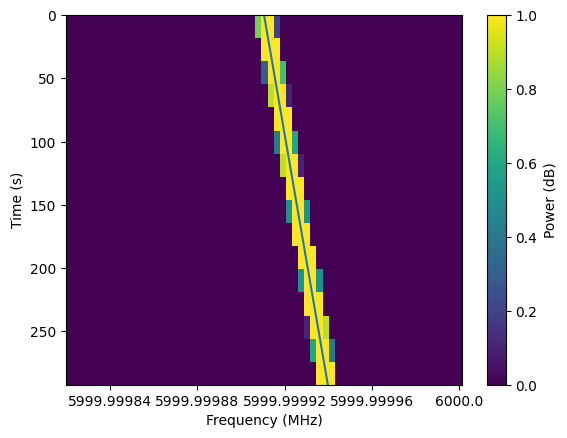

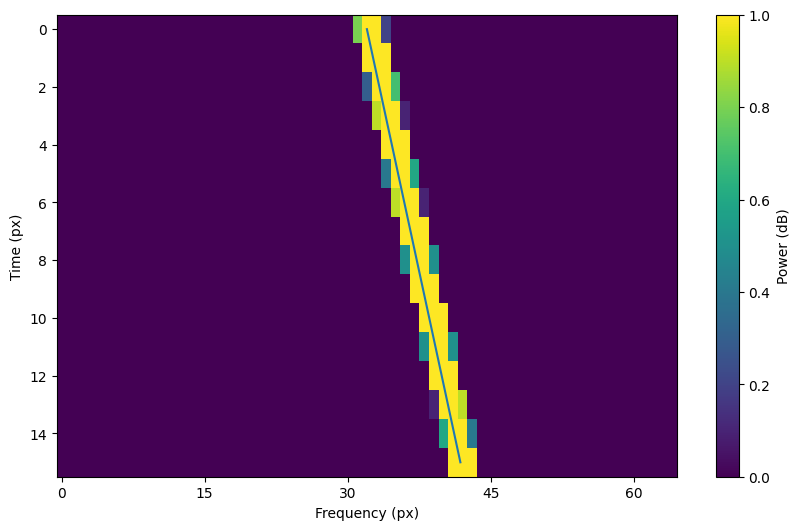

In [6]:
fr = stg.Frame(tchans=16, fchans=2**6+1)
# fr.add_noise(4e6)
drift_rate = 0.1
fr.add_signal(stg.constant_path(f_start=fr.get_frequency(index=fr.fchans//2),
                           drift_rate=drift_rate),
                stg.constant_t_profile(level=1),
                stg.box_f_profile(width=3*fr.df),
                stg.constant_bp_profile(level=1),
                doppler_smearing=True)

plt.figure(figsize=(10, 6))
fr.plot(axis_style="fmid", db=False, grid=True)
plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2) - fr.fmid, fr.ts_ext)
plt.show()

plt.figure(figsize=(6, 4))
fr.plot(axis_style="fmin", db=False)
plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2) - fr.fmin, fr.ts_ext)
plt.show()

# plt.figure(figsize=(6, 4))
fr.plot(axis_style="f", db=False)
plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2), fr.ts_ext)
plt.show()

plt.figure(figsize=(10, 6))
fr.plot(axis_style="px", db=False)
plt.plot(fr.ts * drift_rate / fr.df + fr.fchans//2, fr.ts / fr.dt)
plt.show()

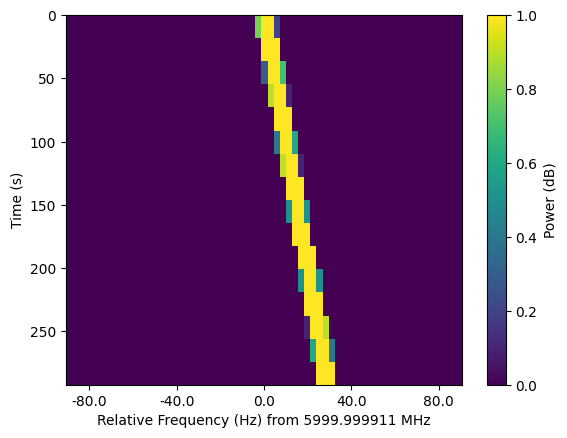

In [13]:
fr.plot(xtype='fmid', db=False)

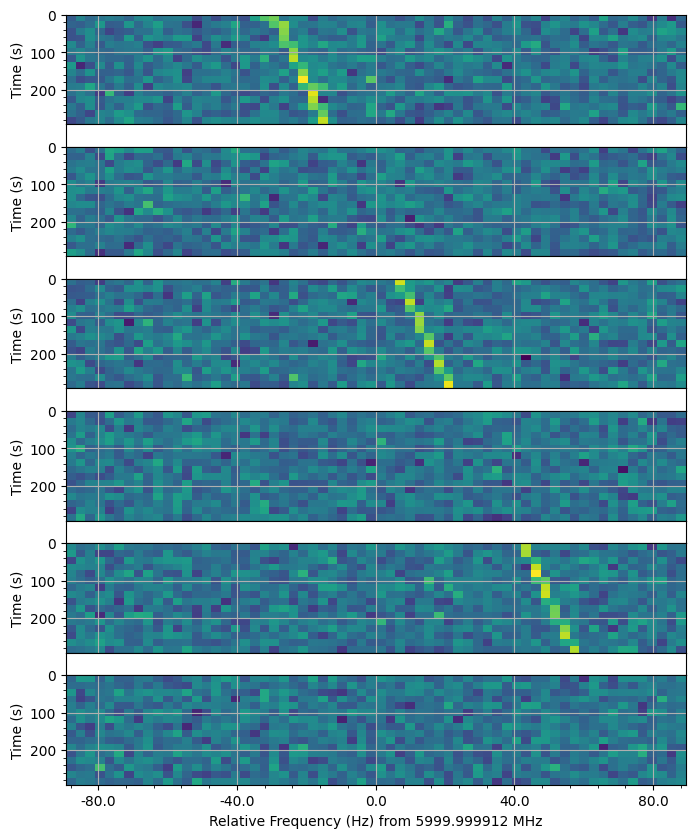

In [3]:
c = stg.OrderedCadence([stg.Frame(tchans=16, fchans=64) for i in range(6)], 
                       order="ABACAD",
                       t_slew=60,
                       t_overwrite=True)
c.apply(lambda fr: fr.add_noise(4e6))
c.by_label("A").add_signal(stg.constant_path(f_start=c[0].get_frequency(index=c.fchans//3),
                           drift_rate=c.fchans//2 / c.tchans * c[0].unit_drift_rate),
                stg.constant_t_profile(level=c[0].get_intensity(snr=30)),
                stg.sinc2_f_profile(width=2*c[0].df*u.Hz, width_mode="crossing", trunc=False),
                stg.constant_bp_profile(level=1),
                doppler_smearing=True)


plt.figure(figsize=(8, 10))
c.plot(minor_ticks=True, grid=True, labels=False, slew_times=True, colorbar=False)
plt.show()


In [6]:
c.plot?

Signature: c.plot(**kwargs)
Docstring:
Plot cadence as a multi-panel figure.

Parameters
----------
cadence : Cadence
    Cadence to plot
xtype : {"fmid", "fmin", "f", "px"}, default: "fmid"
    Types of axis labels, particularly the x-axis. "px" puts axes in units 
    of pixels. The others are all in frequency: "fmid" shows frequencies 
    relative to the central frequency, "fmin" is relative to the minimum 
    frequency, and "f" is absolute frequency.
db : bool, default: True
    Option to convert intensities to dB
slew_times : bool, default: False
    Option to space subplots vertically proportional to slew times
colorbar : bool, default: True
    Whether to display colorbar
labels : bool, default: True
    Option to place target name as a label in each subplot
title : bool, default: False
    Option to place first source name as the figure title
minor_ticks : bool, default: False
    Option to include minor ticks on both axes
grid : bool, default: False
    Option to overplot gr

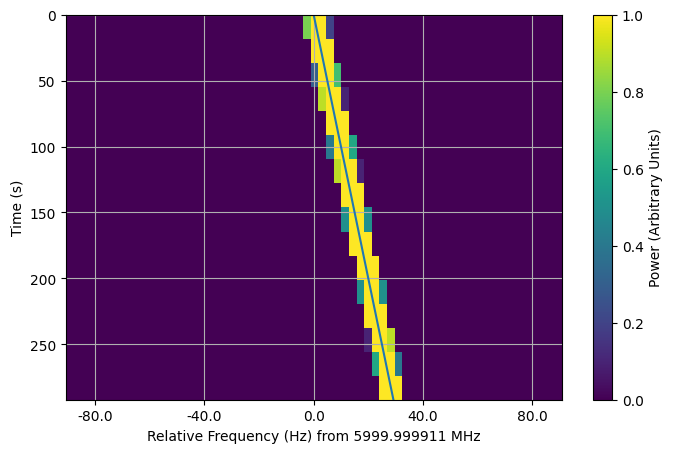

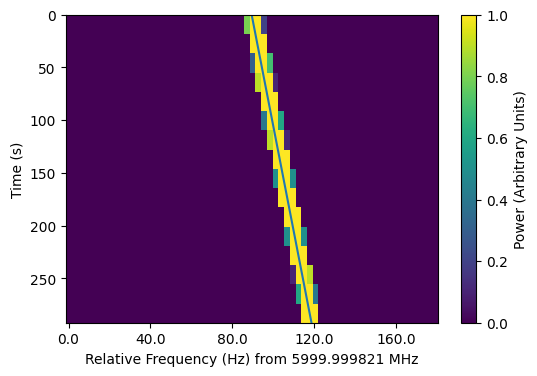

In [8]:
fr = stg.Frame(tchans=16, fchans=2**6+1)
# fr.add_noise(4e6)
drift_rate = 0.1
fr.add_signal(stg.constant_path(f_start=fr.get_frequency(index=fr.fchans//2),
                           drift_rate=drift_rate),
                stg.constant_t_profile(level=1),
                stg.box_f_profile(width=3*fr.df),
                stg.constant_bp_profile(level=1),
                doppler_smearing=True)

plt.figure(figsize=(8, 5))
fr.plot(xtype="fmid", db=False, grid=True)
plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2) - fr.fmid, fr.ts_ext)
plt.show()

plt.figure(figsize=(6, 4))
fr.plot(xtype="fmin", db=False)
plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2) - fr.fmin, fr.ts_ext)
plt.show()
